In [2]:
import cv2
import matplotlib.pyplot as plt
import json
import os
import tqdm
import urllib
import numpy as np
import numpy as np
from pathlib import Path
from PIL import Image,ImageFont,ImageDraw
from googletrans import Translator

In [3]:
path_dir = "D:/study/hackathon/goyang_datathon/[data]2022_Datathon_drawingdata/dataset/train/labels/"
label = []
for i in ['나무/','남자사람/', '여자사람/','집/']:
    for j in range(7,14):
        temp = []
        file_tree = os.listdir(path_dir+i+str(j))
        for index,dir in enumerate(file_tree):
            with open(path_dir+i+str(j)+'/' + dir,'r', encoding="UTF-8") as f:
                json_object = json.load(f)
                temp.append(json_object['annotations'])
                temp[index]['img_path'] = json_object['meta']['img_path']
                temp[index]['img_path'] = temp[index]['img_path'].replace(
                    '../../../../','D:/study/hackathon/goyang_datathon/[data]2022_Datathon_drawingdata/dataset/train/')
        label.extend(temp)

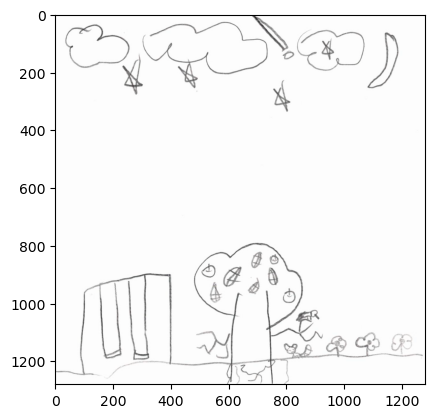

In [5]:
row = label[0]
#한글 주소는 읽을 수 없어서 numpy로 암호화
img = np.fromfile(row['img_path'], np.uint8)
#암호화 된 주소를 decode
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
plt.imshow(img)

In [127]:
translator = Translator()
y = []
for index,a in enumerate(row['bbox']):
    w = a['w']
    h = a['h']
    x = a['x']
    y = a['y']
    cv2.rectangle(
      img,
      (int(x), int(y)),
      (int(x + w), int(y + h)),
      color=(0, 255, 0),
      thickness=2
    )
    name = translator.translate(a['label']).text
    ((label_width, label_height), _) = cv2.getTextSize(
        name,
        fontFace=cv2.FONT_HERSHEY_PLAIN,
        fontScale=1.75,
        thickness=2
    )
    name_list.append(name)
    cv2.rectangle(
      img,
      (int(x), int(y)),
      (int(x + label_width + label_width * 0.05), int(y + label_height + label_height * 0.25)),
      color=(0, 255, 0),
      thickness=cv2.FILLED
    )
    cv2.putText(
      img,
      name,
      org=(int(x), int(y + label_height + label_height * 0.25)), # bottom left
      fontFace=cv2.FONT_HERSHEY_PLAIN,
      fontScale=1.75,
      color=(255, 255, 255),
      thickness=2
    )
#     result = (f"{name} {x} {y} {w} {h}\n")
    y[index] = [name, str(x), str(y), str(w), str(h)]

print(y)
plt.imshow(img)
plt.axis('off')
# plt.savefig('test.png')

TypeError: can only concatenate str (not "int") to str

star


In [129]:
categories = ['allhouse',
'roof',
'housewall',
'door',
'window',
'chimney',
'smoke',
'fence',
'road',
'pond',
'mountain',
'tree',
'flower',
'grass',
'sun',
'alltree'
'woodenpole',
'watertube',
'branch',
'root',
'leaf',
'treeflower',
'fruit',
'swing',
'bird',
'squirrel',
'cloud',
'moon',
'star',
'allperson',
'head',
'face',
'eyes',
'nose',
'mouth',
'ear',
'hair',
'neck',
'body',
'arm',
'hand',
'legs',
'foot',
'button',
'pocket',
'sneakers',
'anklet',
'menshoes']
print(categories[2])

housewall


In [50]:
def create_dataset(label, categories, dataset_type):
    images_path = Path(f"clothing/images/{dataset_type}")
    images_path.mkdir(parents=True, exist_ok=True)
    
    labels_path = Path(f"clothing/labels/{dataset_type}")
    labels_path.mkdir(parents=True, exist_ok=True)
    
    for img_id, row in enumerate(label):
        image_name = f"{img_id}.jpeg"
        img = urllib.request.urlopen(row["img_path"])
        img = Image.open(img)
        img = img.convert("RGB")
        img.save(str(images_path / image_name), "JPEG")
        label_name = f"{img_id}.txt"
        with (labels_path / label_name).open(mode="w") as label_file:
            for a in row['bbox']:
                w = a['w']
                h = a['h']
                x = a['x']
                y = a['y']
                label_file.write(f"{category_idx} {x} {y} {w} {h}\n")
                
create_dataset(label, categories, 'train')
create_dataset(val_clothing, categories, 'val')

URLError: <urlopen error unknown url type: d>

In [47]:
create_dataset(label, categories, 'train')
create_dataset(val_clothing, categories, 'val')
# create_dataset(train_clothing, categories, 'train')
# create_dataset(val_clothing, categories, 'val')

KeyError: 'content'